# import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast
import os
import json
import seaborn as sns
import math
import statsmodels.api as sm
import pickle
import random
from scipy.stats import shapiro, normaltest
import math 
from scipy import stats
import pingouin as pg
from scipy.stats import shapiro
from scipy.stats import ttest_1samp
import scipy
import statsmodels.api as sm

def extract_start_end_points(start_end_df):
    all_chunk_forward_start_mean = []
    all_chunk_forward_end_mean = []
    all_chunk_reverse_start_mean = []
    all_chunk_reverse_end_mean = []

    # s_o_d = []
    for mouse,group in start_end_df.groupby('mouse'):
        chunk_forward_start_mean = []
        chunk_forward_end_mean = []
        chunk_reverse_start_mean = []
        chunk_reverse_end_mean = []
        for diff, chunk in group.groupby('chunk_number'):
            forward_chunk = chunk[chunk.label == 'forward']
            chunk_forward_start_mean += [np.mean(forward_chunk[forward_chunk.group == 'starts']['distances (%)'].values)]
            chunk_forward_end_mean += [np.mean(forward_chunk[forward_chunk.group == 'ends']['distances (%)'].values)]

            reverse_chunk = chunk[chunk.label == 'reverse']
            chunk_reverse_start_mean += [np.mean(reverse_chunk[reverse_chunk.group == 'starts']['distances (%)'].values)]
            chunk_reverse_end_mean += [np.mean(reverse_chunk[reverse_chunk.group == 'ends']['distances (%)'].values)]

        all_chunk_forward_start_mean += [np.mean(chunk_forward_start_mean)]
        all_chunk_forward_end_mean += [np.mean(chunk_forward_end_mean)]
        all_chunk_reverse_start_mean += [np.mean(chunk_reverse_start_mean)]
        all_chunk_reverse_end_mean += [np.mean(chunk_reverse_end_mean)]
        
    return all_chunk_reverse_start_mean, all_chunk_forward_start_mean, all_chunk_reverse_end_mean, all_chunk_forward_end_mean


def plot_start_end_times(e_all_chunk_reverse_start_mean,e_all_chunk_forward_start_mean,e_all_chunk_reverse_end_mean,e_all_chunk_forward_end_mean,ax,ax2,var_str, color_):
        
    ## plot forward start and ends

    ax2.plot(np.array(e_all_chunk_reverse_start_mean),np.ones(len(e_all_chunk_reverse_start_mean))*0.3,'o', color = color_, alpha = 0.5,markeredgewidth = 0, markersize = 9)

    ax2.plot(np.array(e_all_chunk_reverse_end_mean),np.ones(len(e_all_chunk_reverse_end_mean))*0.7,'o', color = color_, alpha = 0.5,markeredgewidth = 0, markersize = 9)


    groups =  ['starts'] * len(e_all_chunk_reverse_start_mean) + (['ends'] * len(e_all_chunk_reverse_end_mean)) 
    data =  e_all_chunk_reverse_start_mean +e_all_chunk_reverse_end_mean

    if len(data) > 0:
        forward_plt_df = pd.DataFrame({'group':groups,'distances (%)': data })
        ax2=sns.boxplot( x = 'distances (%)', y = 'group', data = forward_plt_df, color = color_, width = .2, zorder = 10,\
                    showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
                    showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
                       saturation = 1, orient = 'h',ax = ax2)
        ax2.set_xlabel('realtive start point')
        ax2.set_title(var_str + '    reverse')

    ax2.set_xlim(0,100)

    ###########

    ax.plot(np.array(e_all_chunk_forward_start_mean),np.ones(len(e_all_chunk_forward_start_mean))*0.3,'o', color = color_, alpha = 0.5,markeredgewidth = 0, markersize = 9)

    ax.plot(np.array(e_all_chunk_forward_end_mean),np.ones(len(e_all_chunk_forward_end_mean))*0.7,'o', color = color_, alpha = 0.5,markeredgewidth = 0, markersize = 9)


    groups =  ['starts'] * len(e_all_chunk_forward_start_mean) + (['ends'] * len(e_all_chunk_forward_end_mean)) 
    data =  e_all_chunk_forward_start_mean +e_all_chunk_forward_end_mean

    if len(data) > 0:
        forward_plt_df = pd.DataFrame({'group':groups,'distances (%)': data })
        ax=sns.boxplot( x = 'distances (%)', y = 'group', data = forward_plt_df, color = 'blue', width = .2, zorder = 10,\
                    showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
                    showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
                       saturation = 1, orient = 'h',ax = ax)


        ax.set_xlabel('realtive start point')
        ax.set_title(var_str + '    forward')


    ax.set_xlim(0,100)
    
    plt.tight_layout()
    

def plot_decay(nrem_binned_rate,nrem_bins_relative_so,rem_binned_rate,rem_bins_relative_so,color_1, color_2, title_):
    fig,ax = plt.subplots(1, 1,figsize=(10, 5))
    AA_rate = []
    AA_post_so_time = []
    times = []
    rates = []
    for i,item in enumerate(nrem_binned_rate):
        across_chunks_x = []
        across_chunks_y = []
        for e,chunk_item in enumerate(item):
            #mean for each time series across chunks
            across_chunks_x += [np.mean(nrem_bins_relative_so[i][e])]
            across_chunks_y += [np.mean(chunk_item)]
        AA_rate+=[across_chunks_y]
        AA_post_so_time+=[across_chunks_x]
        ax.plot(across_chunks_x,across_chunks_y, '-o',c = color_1, markersize = 10, markeredgewidth = 0, alpha = 0.8)
        # save out stuff for plot 2
        rate_change_per_min = np.diff(across_chunks_y)/np.diff(across_chunks_x)
        times += across_chunks_y[0:-1]
        rates += list(rate_change_per_min)
        
    AA_rate = []
    AA_post_so_time = []
    times_2 = []
    rates_2 = []
    for i,item in enumerate(rem_binned_rate):
        across_chunks_x = []
        across_chunks_y = []
        for e,chunk_item in enumerate(item):
            #mean for each time series across chunks
            across_chunks_x += [np.mean(rem_bins_relative_so[i][e])]
            across_chunks_y += [np.mean(chunk_item)]
        AA_rate+=[across_chunks_y]
        AA_post_so_time+=[across_chunks_x]
        ax.plot(across_chunks_x,across_chunks_y, '-o',c = color_2, alpha = 1, markersize = 10, markeredgewidth = 0)
        # save out stuff for plot 2
        rate_change_per_min = np.diff(across_chunks_y)/np.diff(across_chunks_x)
        times_2 += across_chunks_y[0:-1]
        rates_2 += list(rate_change_per_min)
        
    ax.set_title(title_)
    ax.set_xlabel('time after sleep onset (mins)')

    fig,ax = plt.subplots(1, 1,figsize=(5, 5))                
    sns.regplot(x=times, y=rates, ax = ax, color = color_1,scatter_kws={'s': 160, 'alpha': 0.3,'linewidths': 0})
    sns.regplot(x=times_2, y=rates_2, ax = ax, color = color_2,scatter_kws={'s': 160, 'alpha': 0.3,'linewidths': 0})
    ax.set_xlabel('starting rate')
    ax.set_ylabel('rate change per minute')
    ax.axhline(0,0,ls ='--')
    
    group1_data = {'x': times, 'y': rates}
    group2_data = {'x': times_2, 'y': rates_2}
    return group1_data, group2_data

def conactinate_nth_items(startlist):
    concatinated_column_vectors = []
    for c in range(len(max(startlist, key=len))):
        column = []
        for t in range(len(startlist)):
            if c <= len(startlist[t])-1:
                column = column + [startlist[t][c]]
        concatinated_column_vectors.append(column)
    return concatinated_column_vectors

def find_closest_example(numbers, examples):
    # Initialize dictionaries to store the closest example and example totals
    closest_examples = {}
    example_totals = {example: 0 for example in examples}

    # Iterate over each number in the list
    for number in numbers:
        # Initialize a variable to keep track of the closest example
        closest_example = None
        min_distance = float('inf')  # Initialize the minimum distance to infinity

        # Compare the number with each example
        for example in examples:
            # Calculate the absolute difference between the number and example
            distance = abs(number - example)

            # Check if the current example is closer than the previous closest example
            if distance < min_distance:
                min_distance = distance
                closest_example = example

        # Update the closest example for the current number in the dictionary
        closest_examples[number] = closest_example

        # Increment the total count for the closest example
        example_totals[closest_example] += 1

    return closest_examples, example_totals

def relative_warp_values(e_f_warp_factors):
    rels = []
    for item in e_f_warp_factors:
        if sum(item) > 0:
            # normalize the warp factors to sum to 1
            rels += [list(np.array(item)/sum(item))]
    return rels



bins_ = [0.1, 0.2, 1,2, 5, 10,20,40]

def extract_mean_warps(regression_df, bins_):

    f_warp_factors = []
    r_warp_factors = []

    forward = []
    reverse = []
    
    forward_total = []
    reverse_total = []

    for mouse, group in regression_df.groupby('mouse'):
        #forward:
        data = list(group.warp_factor.values[group.warp_factor.values > 0])
        forward_total += [len(data)]
        closest_examples,example_totals = find_closest_example(data,bins_)
        f_warp_factors +=[list(example_totals.values())]
        forward += [sum(example_totals.values())]
        #reverse:
        data = list(abs(group.warp_factor.values[group.warp_factor.values < 0]))
        reverse_total += [len(data)]
        closest_examples,example_totals = find_closest_example(data,bins_)
        r_warp_factors +=[list(example_totals.values())]
        reverse += [sum(example_totals.values())]

            
    f_warp_factors = relative_warp_values(f_warp_factors)
    r_warp_factors = relative_warp_values(r_warp_factors)
    
    return f_warp_factors, r_warp_factors, forward_total, reverse_total

def plot_warp_factors(ax, f_warp_factors, r_warp_factors, bins_, color_):

    bin_labels = [item + 'x' for item in np.array(bins_).astype(str)]

    means = []
    sems = []
    for item in conactinate_nth_items(f_warp_factors):
        means += [np.mean(item)]
        sems += [scipy.stats.sem(item)]
    ax.plot(means,'-->', color = color_, markersize = 8, label = 'forward')
    upper = np.array(means)+ sems
    lower = np.array(means)- sems
    ax.fill_between((range(len(bin_labels))),(lower),(upper),
        alpha=0.2, edgecolor='None', facecolor=color_,
        linewidth=1, linestyle='dashdot', antialiased=True)

    means = []
    sems = []
    for item in conactinate_nth_items(r_warp_factors):
        means += [np.mean(item)]
        sems += [scipy.stats.sem(item)]
    ax.plot(means,'--<', color = color_, markersize = 8,label = 'reverse')
    upper = np.array(means)+ sems
    lower = np.array(means)- sems
    ax.fill_between((range(len(bin_labels))),(lower),(upper),
        alpha=0.2, edgecolor='None', facecolor=color_,
        linewidth=1, linestyle='dashdot', antialiased=True)
    ax.set_ylim(0,0.4)


def plot_sleep_awake_spike_position(ax,x,y,color_):
    # Create a pandas DataFrame
    df = pd.DataFrame({'x': x, 'y': y})

    # Define bin edges for y-values
    bin_edges = np.linspace(0, 1, num=15)  # 5 bins from 0 to 1

    # Bin the data based on y-values
    df['bin'] = pd.cut(df['y'], bins=bin_edges)

    # Calculate the middle points of the bins
    bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Calculate the mean and standard deviation of each bin
    bin_means = df.groupby('bin')['x'].mean()
    bin_std = df.groupby('bin')['x'].std()

    # Plot

    ax.plot(bin_midpoints,bin_means,'o-', c = color_, markersize = 8)
    # plt.plot(bin_midpoints, bin_means, width=0.1, align='center', label='Mean')

    # Fill between mean line +- standard deviation
    plt.fill_between(bin_midpoints, bin_means - bin_std, bin_means + bin_std, color=color_, alpha=0.3)
    
    return bin_means.values,bin_midpoints


def test_univariate_normality(x, y, alpha=0.05):
    """
    Performs Shapiro-Wilk and D'Agostino's tests on each axis.
    Prints p-values and a simple verdict.
    """
    for name, data in (('x', x), ('y', y)):
        W, p_sw = shapiro(data)
        K2, p_k2 = normaltest(data)
        print(f"--- {name}-axis ---")
        print(f" Shapiro–Wilk:    W={W:.3f}, p={p_sw:.3f} -> {'non-normal' if p_sw<alpha else 'normal'}")
        print(f" D’Agostino K²: K²={K2:.3f}, p={p_k2:.3f} -> {'non-normal' if p_k2<alpha else 'normal'}\n")



with open(r"Z:\projects\sequence_squad\revision_data\emmett_revisions\Replay_plots_remade\expert\\" + "processed_replay_data.pkl", 'rb') as f:
    expert_master = pickle.load(f)


def normalize_times(times):
    min_time = min(times)
    max_time = max(times)
    time_range = max_time - min_time

    normalized_times = [(t - min_time) / time_range for t in times]
    return normalized_times


def determine_neuron_spike_pos(replay_motif_data,seq_type):
    neuron_spike_positions = {}
    for i in range(len(replay_motif_data)):

        if replay_motif_data.cluster_seq_type[i] == seq_type:

            replay_neurons = ast.literal_eval(replay_motif_data.cluster_neurons[i])
            replay_spikes = np.array(ast.literal_eval(replay_motif_data.cluster_spike_times[i]))

            norm_replay_spikes = normalize_times(replay_spikes)

            replay_neurons_fspike_only = replace_repeats_with_string(replay_neurons)

            for index,neur_id in enumerate(replay_neurons_fspike_only):
                if not neur_id == 'repeat':
                    if neur_id in neuron_spike_positions:
                        neuron_spike_positions[neur_id] += [norm_replay_spikes[index]]

                    else:
                        neuron_spike_positions[neur_id] = [norm_replay_spikes[index]]
    return neuron_spike_positions

def replace_repeats_with_string(numbers):
    seen = set()
    result = []

    for num in numbers:
        if num in seen:
            result.append('repeat')
        else:
            result.append(num)
            seen.add(num)

    return result


def load_input_params(pp_path, file, mouse_session_recording):
    input_params_path = os.path.join(pp_path, file, 'trainingData', f'params_{mouse_session_recording}.json')
    input_config = load_json(input_params_path)
    behav_time_interval_start = input_config['time_span'][0]
    print(f"      A corresponding time span has been found. Time span set to {behav_time_interval_start}")
    return behav_time_interval_start

def load_behav_data(dat_path, behav_time_interval_start):
    print("\nLOADING BEHAV DATA")
    behav_sync = pd.read_csv(os.path.join(dat_path, 'behav_sync', '2_task', 'Behav_Ephys_Camera_Sync.csv'))
    transitions = pd.read_csv(os.path.join(dat_path, 'behav_sync', '2_task', 'Transition_data_sync.csv'))

    behav_mask = (behav_sync.PokeIN_EphysTime > behav_time_interval_start[0]) & (behav_sync.PokeIN_EphysTime < behav_time_interval_start[1])
    poke_in_times = behav_sync[behav_mask].PokeIN_EphysTime - behav_time_interval_start[0]
    ports = behav_sync[behav_mask].Port
    print('done')
    return behav_sync, transitions, poke_in_times, ports,behav_mask

# ## set ppseq file
def find_example_file(PP_PATH, example = '178_1_7'):
    for file_ in os.listdir(PP_PATH):
        if example in file_:
            file = file_
    return file 

def Load_example_data(pp_path, file, dat_path, mouse_session_recording = '178_1_7'):
    # Load processed spike data
    latent_event_history_df_split, spikes_seq_type_adjusted, neuron_order, ordered_preferred_type, neuron_index, config = load_processed_spike_data(pp_path, file)
    
    
    # Load the timespan used for pppseq
    behav_time_interval_start = load_input_params(pp_path, file, mouse_session_recording)
    
    # Load behaviour data
    behav_sync, transitions, poke_in_times, ports,behav_mask = load_behav_data(dat_path, behav_time_interval_start)
    
    
    neuron_response_df = pd.read_csv(pp_path + file + r"\neuron_response.csv")
    bkgd_log_proportions_array = pd.read_csv(pp_path + file + r"\bkgd_log_proportions_array.csv")

    # Return all loaded data for further processing if needed
    return {
        "latent_event_history_df_split": latent_event_history_df_split,
        "spikes_seq_type_adjusted": spikes_seq_type_adjusted,
        "neuron_order": neuron_order,
        "ordered_preferred_type": ordered_preferred_type,
        "neuron_index": neuron_index,
        "config": config,
        "behav_sync": behav_sync,
        "transitions": transitions,
        "poke_in_times": poke_in_times,
        "ports": ports,
        "neuron_response_df" : neuron_response_df,
        "bkgd_log_proportions_array" : bkgd_log_proportions_array,
        "behav_time_interval_start" : behav_time_interval_start,
        "behav_mask" : behav_mask
    }
    
def plot_zoomed_example_raster(data,ordering,colors,timeframe):

    mask = (data["spikes_seq_type_adjusted"].timestamp>timeframe[0])*(data["spikes_seq_type_adjusted"].timestamp<timeframe[-1])

    ## neuron order:

    #define neuron order
    neuron_index,ordered_preferred_type = sortperm_neurons(data["bkgd_log_proportions_array"],data["config"],data["neuron_response_df"], sequence_ordering=ordering)
    # make a list of idndies for each neurons new position
    neuron_permute_loc = np.zeros(len(neuron_index))
    for i in range(len(neuron_index)):
        neuron_permute_loc[i] = int(list(neuron_index).index(i))

    neuron_permute_loc = np.array(shuffle(list(neuron_permute_loc.astype(int))))
    neuron_order = neuron_permute_loc[data["spikes_seq_type_adjusted"].neuron.values.astype(int)-1]

    # make a list of idndies for each neurons new position
    neuron_permute_loc = np.zeros(len(neuron_index))
    for i in range(len(neuron_index)):
        neuron_permute_loc[i] = int(list(neuron_index).index(i))
    #         neuron_order = neuron_permute_loc[unmasked_spikes_df.neuron-1]
    neuron_order = neuron_permute_loc[ data["spikes_seq_type_adjusted"].neuron.values.astype(int)-1]

    ## plotting:
    nrow = 1
    ncol = 1

    fig, ax = plt.subplots(nrow, ncol,figsize=(4, 5))

    # plot background in grey 
    background_keep_mask =  data["spikes_seq_type_adjusted"][mask].sequence_type_adjusted <= 0
    ax.scatter( data["spikes_seq_type_adjusted"][mask][background_keep_mask].timestamp, neuron_order[mask][background_keep_mask],marker = 'o', s=20, linewidth=0,color = 'grey' ,alpha=0.3)

    # plot spikes without background
    background_remove_mask = data["spikes_seq_type_adjusted"][mask].sequence_type_adjusted >= 0
    c_ = np.array(colors)[data["spikes_seq_type_adjusted"][mask][background_remove_mask].sequence_type_adjusted.values.astype(int)]
    # ## faster:
    ax.scatter( data["spikes_seq_type_adjusted"][mask][background_remove_mask].timestamp, neuron_order[mask][background_remove_mask],marker = 'o', s=20, linewidth=0,color = c_ ,alpha=1)

    return

def load_processed_spike_data(pp_path, file):
    print("\nLOADING processed_spike_data")
    analysis_path = os.path.join(pp_path, file, "analysis_output")
    
    latent_event_history_df_split = load_pickle(os.path.join(analysis_path, "latent_event_history_df_split.pickle"))
    spikes_seq_type_adjusted = load_pickle(os.path.join(analysis_path, "spikes_seq_type_adjusted.pickle"))
    neuron_order = np.load(os.path.join(analysis_path, 'neuron_order.npy'))
    ordered_preferred_type = np.load(os.path.join(analysis_path, 'ordered_preferred_type.npy'))
    neuron_index = np.load(os.path.join(analysis_path, 'neuron_index.npy'))

    config = eval(load_json(os.path.join(pp_path, file, 'config_file.json')))

    return latent_event_history_df_split, spikes_seq_type_adjusted, neuron_order, ordered_preferred_type, neuron_index, config


def shuffle(aList):
    random.shuffle(aList)
    return aList

def load_pickle(file_path):
    with open(file_path, "rb") as input_file:
        return pickle.load(input_file)


def load_json(file_path):
    with open(file_path) as f:
        return json.load(f)
    

def sortperm_neurons(bkgd_log_proportions_array,config,neuron_response_df, sequence_ordering=None, th=0.2):
    ## this is number of neurons in total
    N_neurons= bkgd_log_proportions_array.shape[1]
    ## number of sequences from json file 
    n_sequences = config["num_sequence_types"]
    # the 18 neuron params for each neuron from the last iteration
    all_final_globals = neuron_response_df.iloc[-N_neurons:]
    # this cuts it down to just the first 6 params - i think this correspond sto the first param for each seq type? response probABILITY - ie the chance that a neuron spikes in a given latent seq 
    resp_prop = np.exp(all_final_globals.values[:, :n_sequences])#
    # this takes the next 6 params - which i think are the offset values
    offset = all_final_globals.values[-N_neurons:, n_sequences:2*n_sequences]
    ## finds the max response value - ie. which seq it fits to? 
    peak_response = np.amax(resp_prop, axis=1)
    # then threshold the reponse
    has_response = peak_response > np.quantile(peak_response, th)
    # I thin this is the sequence that the neuron has the max response for: ie. we are ordering them by max response 
    preferred_type = np.argmax(resp_prop, axis=1)
    if sequence_ordering is None:
        # order them by max reponse 
        ordered_preferred_type = preferred_type
    else:
        #order them differnetly 
        ordered_preferred_type = np.zeros(N_neurons)#
        # loop through each sequence
        for seq in range(n_sequences):
            # where does  max repsone = user defined seque
            seq_indices = np.where(preferred_type == sequence_ordering[seq])
            # change order to different seq
            ordered_preferred_type[seq_indices] = seq

    # reorder the offset params according to max respsone
    preferred_delay = offset[np.arange(N_neurons), preferred_type]
    Z = np.stack([has_response, ordered_preferred_type+1, preferred_delay], axis=1)
    indexes = np.lexsort((Z[:, 2], Z[:, 1], Z[:, 0]))
    return indexes,ordered_preferred_type


def effect_size(x=None, y=None, test='ttest', dv=None, between=None, data=None,
                dm=None, grouping=None, popmean=None, permutations=999):
    """
    Calculate effect sizes for parametric, non-parametric, regression, and PERMANOVA.

    Parameters
    ----------
    x : array-like
        First sample (or single sample for one-sample t-test)
    y : array-like, optional
        Second sample (if applicable)
    test : str
        One of ['ttest', 'paired_ttest', 'one_sample_ttest', 'anova',
                'mannwhitney', 'wilcoxon', 'kruskal', 'correlation', 'permanova']
    dv, between, data : for ANOVA/Kruskal (pingouin syntax)
    dm : DistanceMatrix for PERMANOVA
    grouping : array-like of group labels for PERMANOVA
    popmean : population mean for one-sample t-test
    permutations : number of permutations for PERMANOVA
    """
    # Convert to numpy arrays if needed
    x = np.array(x) if x is not None else None
    y = np.array(y) if y is not None else None

    if test == 'ttest':  # independent
        t, p = stats.ttest_ind(x, y)
        pooled_std = np.sqrt(((len(x)-1)*x.std(ddof=1)**2 + (len(y)-1)*y.std(ddof=1)**2) / (len(x)+len(y)-2))
        d = (x.mean() - y.mean()) / pooled_std
        return {"cohens_d": d}

    elif test == 'paired_ttest':
        t, p = stats.ttest_rel(x, y)
        d = (x - y).mean() / (x - y).std(ddof=1)
        return {"cohens_d": d}

    elif test == 'one_sample_ttest':
        if popmean is None:
            raise ValueError("popmean must be provided for one-sample t-test")
        t, p = stats.ttest_1samp(x, popmean)
        d = (x.mean() - popmean) / x.std(ddof=1)
        return {"cohens_d": d}

    elif test == 'anova':
        res = pg.anova(dv=dv, between=between, data=data, detailed=True)
        return res[['Source', 'F', 'p-unc', 'eta-square', 'partial_eta-square']]

    elif test == 'mannwhitney':
        res = pg.mwu(x, y, alternative='two-sided', effsize='r')
        return {"test": "Mann-Whitney U", "U": res['U-val'][0], "p": res['p-val'][0], "rank_biserial_r": res['RBC'][0]}

    elif test == 'wilcoxon':
        res = pg.wilcoxon(x, y, alternative='two-sided')
        return {"test": "Wilcoxon signed-rank", "W": res['W-val'][0], "p": res['p-val'][0], "rank_biserial_r": res['RBC'][0]}

    elif test == 'kruskal':
        res = pg.kruskal(data=data, dv=dv, between=between)
        return res[['H', 'p-unc', 'eta-square', 'eps-square']]

    elif test == 'correlation':
        r, p = stats.pearsonr(x, y)
        return {"test": "Pearson correlation", "r": r, "p": p}

    else:
        raise ValueError(f"Unsupported test type: {test}")


def poisson_probability(rate, k):
    """Calculate Poisson probability of k events occurring given the rate."""
    return math.exp(-rate) * (rate ** k) / math.factorial(k)

def calculate_probabilities(rate_per_second, event_length_s):
    # Convert event length from milliseconds to seconds
    
    # Calculate the rate per 0.3 seconds considering event length
    rate_per_0p3_seconds = rate_per_second *(0.3 + event_length_s)
    
    results = {}
    total_probability = 0  # Variable to store the total probability
    
    for k in range(1, 7):  # Include probabilities for 1 to 6 events
        probability = poisson_probability(rate_per_0p3_seconds, k)
        results[k] = probability
        total_probability += probability  # Add probability to the total
    
    # Calculate percentages
    percentages = {k: (probability / total_probability) * 100 for k, probability in results.items()}
    
    return rate_per_0p3_seconds, results, percentages


# plot frequency of coactive events (1,2,3,4,etc.)

def plot_coactive_single(nrem_coactive_freqs_chunk, color_,var_string):   
    fig, ax= plt.subplots(1, 1,figsize=(3, 5))
    means = []
    stds = []
    x_ = []
    for item in nrem_coactive_freqs_chunk:
        ax.plot(np.ones(len(nrem_coactive_freqs_chunk[1]))*(1),nrem_coactive_freqs_chunk[1],'o', c = color_, alpha = 0.5, markeredgewidth = 0, markersize = 9)
        x_ += [item]
        means += [np.median(nrem_coactive_freqs_chunk[1])]
        stds += [np.std(nrem_coactive_freqs_chunk[1])]
        break 
    means = np.array(means)[np.argsort(x_)]
    stds = np.array(stds)[np.argsort(x_)]
    x_ = np.array(x_)[np.argsort(x_)]
    ax.plot(1.2,means[0],'<', color = color_,alpha = 0.7, markeredgewidth = 0, markersize = 9)
    ax.set_xlim(0,2)
    ax.set_ylabel('frequency')
    ax.set_title(var_string + ' coactive frequency')
    ax.set_ylim(0,1)


def plot_coactive_two_plus(nrem_coactive_freqs_chunk, color_,var_string): 
    max_keys = 6
    nrem_coactive_freqs_chunk_collapsed = collapse_above_keys(nrem_coactive_freqs_chunk,max_keys)   

    fig, ax= plt.subplots(1, 1,figsize=(7, 5))
    means = []
    stds = []
    x_ = []
    for item in nrem_coactive_freqs_chunk_collapsed:
        if not item == 1:
            ax.plot(np.ones(len(nrem_coactive_freqs_chunk_collapsed[item]))*(item-0.1),nrem_coactive_freqs_chunk_collapsed[item],'o', c = color_, alpha = 0.5, markeredgewidth = 0, markersize = 9)
            x_ += [item]
            means += [np.mean(nrem_coactive_freqs_chunk_collapsed[item])]
            stds += [np.std(nrem_coactive_freqs_chunk_collapsed[item])]
    means = np.array(means)[np.argsort(x_)]
    stds = np.array(stds)[np.argsort(x_)]
    x_ = np.array(x_)[np.argsort(x_)]

    ax.plot(x_,means,'<', color = color_,alpha = 0.7, markeredgewidth = 0, markersize = 8)
    ax.set_title(var_string + ' coactive frequency')
    ax.set_xlabel('number of coactive events')
    # SET THE X MARKERS 
    ax.set_xticks(np.arange(0, max_keys+2, 1))
    ax.set_xticklabels(['_','_','2','3','4','5','6+','_'])
    ax.set_ylim(0,0.4)
    
    return nrem_coactive_freqs_chunk_collapsed
    
# get a reference to the original dict
def collapse_above_keys(freqs,max_key):

    # prepare a new dict and a placeholder for the merged value
    new_freqs = {}
    merged = []

    for k, v in freqs.items():
        if k < max_key:
            # keep all keys < max_key unchanged
            new_freqs[k] = v
        else:
            # collect everything with key >= max_key
            merged.append(v)

    # now combine the collected values into one entry "6+"
    # — if your values are numbers, you can sum them:
    if not len(merged) == 0:
        try:
            new_freqs[6] = sum(merged)
        except TypeError:
            # otherwise assume they’re sequences (lists, arrays…) and flatten:
            import itertools
            new_freqs[6] = list(itertools.chain.from_iterable(merged))

    # replace in your master dict
    return new_freqs


def cohens_d(x, y):
    """
    Compute Cohen's d for two independent samples.
    """
    x = np.array(x)
    y = np.array(y)
    nx = len(x)
    ny = len(y)
    # Pooled standard deviation
    pooled_std = np.sqrt(((nx-1)*x.std(ddof=1)**2 + (ny-1)*y.std(ddof=1)**2) / (nx + ny - 2))
    d = (x.mean() - y.mean()) / pooled_std
    return d

def permutation_test(list1, list2):
    # Define your test statistic function
    def test_statistic(list1, list2):
        return np.mean(list1) - np.mean(list2)

    # Compute the observed test statistic
    observed_statistic = test_statistic(list1, list2)

    # Combine the two lists
    combined_data = list1 + list2

    # Number of permutations
    num_permutations = 100000

    # Initialize an array to store the permuted test statistics
    permuted_statistics = np.zeros(num_permutations)

    # Permutation test
    for i in range(num_permutations):
        # Shuffle the combined data
        np.random.shuffle(combined_data)
        
        # Split the shuffled data back into two lists
        permuted_list1 = combined_data[:len(list1)]
        permuted_list2 = combined_data[len(list1):]
        
        # Compute the test statistic for the permuted data
        permuted_statistics[i] = test_statistic(permuted_list1, permuted_list2)

    # Calculate the p-value
    p_value = np.mean(permuted_statistics >= observed_statistic)


    plt.figure(figsize=(4, 3))
    plt.hist(permuted_statistics, bins=30, alpha=0.5, color='blue', edgecolor='black')
    plt.axvline(observed_statistic, color='red', linestyle='dashed', linewidth=2, label='Observed Statistic')
    plt.xlabel('Test Statistic')
    plt.ylabel('Frequency')
    plt.title('Distribution of Permuted Test Statistics')
    plt.axvline(np.percentile(permuted_statistics, 97.5), color='green', linestyle='dashed', linewidth=2, label='95th Percentile')
    plt.axvline(np.percentile(permuted_statistics, 2.5), color='green', linestyle='dashed', linewidth=2)
    plt.axvline(np.percentile(permuted_statistics, 99), color='green', linestyle='dashed', linewidth=2, label='99th Percentile')
    plt.axvline(np.percentile(permuted_statistics, 1), color='green', linestyle='dashed', linewidth=2)
    plt.xlabel('Test Statistic')
    plt.legend()
    plt.grid(True)
    plt.show()
    

    print("- p-value:", p_value)
    print('- 99th percentile of permuted statistics:',np.percentile(permuted_statistics, 99))
    print("- Observed Test Statistic:", observed_statistic)


In [3]:

# from Utilities.utils import *

# Get the current working directory
current_working_dir = os.getcwd()
current_working_dir = '//'.join(current_working_dir.split('\\')[0:-1]) + r'//data/f3//'

yellow = '#8FC681'
green = '#4DA5BF'
blue = '#FFD161'
red = '#36495E'
dark_blue = '#724F94'
purple = '#EE7060'
gold = '#C6963E'
colors = ['---',red,green,yellow,blue,purple,gold,dark_blue]


# sleep_time_point_df = pd.read_csv(current_working_dir + 'sleep_time_points.csv')
# expert_mice = sleep_time_point_df[sleep_time_point_df.group == 'expert'].mir.values

# figure B


LOADING processed_spike_data
      A corresponding time span has been found. Time span set to [5400, 6000]

LOADING BEHAV DATA
done


C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_47932\2636075624.py:477: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  return pickle.load(input_file)


[np.int64(1), np.int64(4), np.int64(3), np.int64(0), np.int64(5), np.int64(2)]


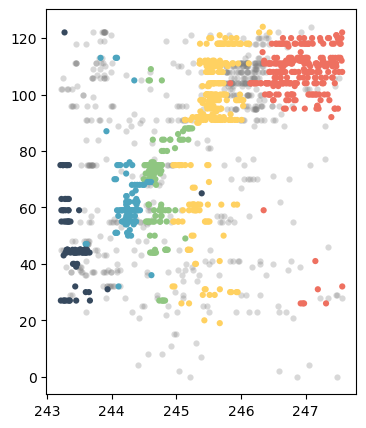

In [4]:
# Get the current working directory
f3_working_dir = os.getcwd()
f3_working_dir = '//'.join(f3_working_dir.split('\\')[0:-1]) + r'//data/f2//'

PP_PATH = f3_working_dir + 'ppseq_output_awake\\'
dat_path = f3_working_dir + 'example_mouse_data\\'
        
file = find_example_file(PP_PATH)
        
data = Load_example_data(PP_PATH, file, dat_path)

### change the color ordering to standard color ordering: 
# recolor and save these plots out
current_color_order = [purple, blue, red, gold, yellow, green]
colors = ['---',red,green,yellow,blue,purple,gold,dark_blue]
# ## recolor based on current and desired color order
new_order_inds = [0]
for item in current_color_order:
    new_order_inds += [np.where(np.array(colors) == item)[0][0]]
# apply this ordering
new_colors = colors.copy()
for i,index in enumerate(new_order_inds):
    colors[index] = new_colors[i]                          
# determine new ordering based on this as well
ordering = list((np.array(new_order_inds)-1)[np.array(new_order_inds)-1 >=0])
#swap last 'extra' seq down to the bottom 
ordering = [ordering[-1]] + ordering[0:-1]
print(ordering)

# plot zoomed example
plot_zoomed_example_raster(data,ordering,colors,timeframe = [243.2,247.57])

# figure C

Text(0.5, 1.0, 'held sequences in colour and extra sequences + background in grey')

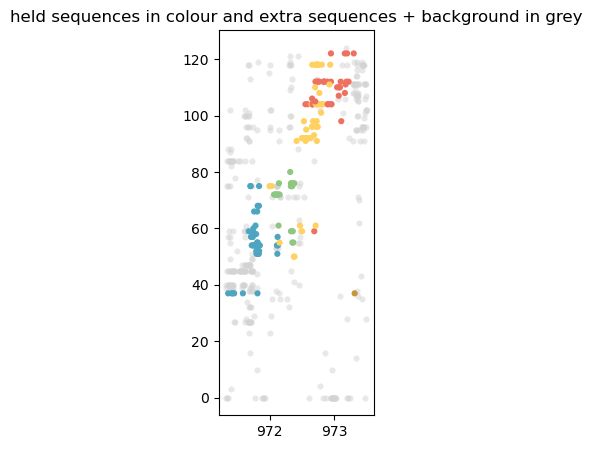

In [4]:
file_path = current_working_dir + 'example_replay_data.json'
with open(file_path, 'r') as file:
    example_sleep_data = json.load(file)

# example_sleep_spikes 
spikes_df = pd.read_csv(current_working_dir + 'example_replay_spikes.csv')

# caluclate interval timings and end points
interval_lengths =[]
for interval in example_sleep_data['behav_time_interval_start']:
    interval_lengths+= [np.diff(interval)[0]]
total_time = sum(interval_lengths)
interval_end_points = np.cumsum(interval_lengths)

# 10
timeframe = [971.3,973.5]

mask = (spikes_df.timestamp>timeframe[0])*(spikes_df.timestamp<timeframe[-1])
## neuron order:

#define neuron order
neuron_permute_loc = np.zeros(len(example_sleep_data["neuron_index"]))
for i in range(len(example_sleep_data["neuron_index"])):
    neuron_permute_loc[i] = int(list(example_sleep_data["neuron_index"]).index(i))
neuron_order = neuron_permute_loc[(spikes_df.neuron-1).astype(int)]

## plotting:

fig, ax = plt.subplots(1, 1,figsize=(2, 5))

# plot background in grey 
background_keep_mask = []
for item in spikes_df[mask].sequence_type_adjusted:
    if item < 0 or item >= 7.0:
        background_keep_mask.append(True)
    else:
        background_keep_mask.append(False)
background_keep_mask = np.array(background_keep_mask)
ax.scatter(spikes_df[mask][background_keep_mask].timestamp, neuron_order[mask][background_keep_mask],marker = 'o', s=20, linewidth=0,color = 'lightgrey' ,alpha=0.5)

# plot spikes without background
background_remove_mask = spikes_df[mask].sequence_type_adjusted >= 0
background_remove_mask = (spikes_df[mask].sequence_type_adjusted >= 0)*(spikes_df[mask].sequence_type_adjusted != 7.0)*(spikes_df[mask].sequence_type_adjusted != 8.0)
c_ = np.array(colors)[spikes_df[mask][background_remove_mask].sequence_type_adjusted.values.astype(int)]
# ## faster:
ax.scatter(spikes_df[mask][background_remove_mask].timestamp, neuron_order[mask][background_remove_mask],marker = 'o', s=20, linewidth=0,color = c_ ,alpha=1)
ax.set_title('held sequences in colour and extra sequences + background in grey')

# figure D

C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_40048\2078301624.py:26: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  std_devs.append(scipy.stats.sem(neuron_spike_positions[neuron]))


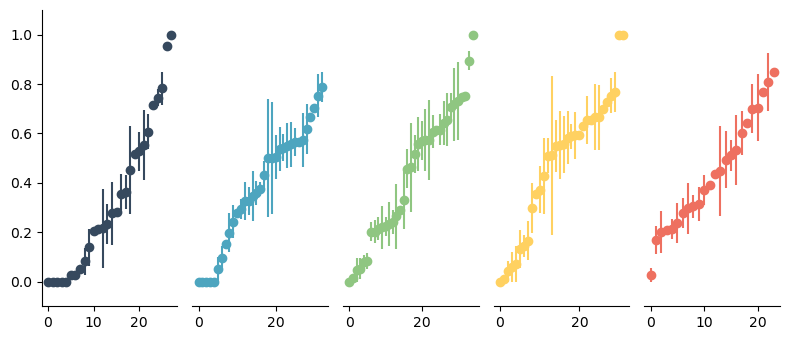

In [5]:
replay_motif_data= pd.read_csv('Z:\\projects\\sequence_squad\\organised_data\\ppseq_data\\finalised_output\\striatum\\paper_submission\\post_sleep\\\\178_1_7_run_1207023_1350\\\\_final_analysis_output\\chunk3_13300to14300\\temporal_structure_analysis\\replay_motif_data_updated.csv')


# filter for sequentially forward replay
sequential_replay_motif_data = replay_motif_data[replay_motif_data.catagory == 'forward']
sequential_replay_motif_data = sequential_replay_motif_data.reset_index(drop = True)

forward_neuron_spike_positions_all_seqs = []
for i in range(1,7):
    forward_neuron_spike_positions_all_seqs += [determine_neuron_spike_pos(sequential_replay_motif_data,i)]

fig, axs = plt.subplots(1,5, figsize=(8,3.5))
ordering = [4,3,0,5,2]

for i, ax in enumerate(axs):
    idx = ordering[i]
    neuron_spike_positions = forward_neuron_spike_positions_all_seqs[idx]

    if len(neuron_spike_positions) > 1:
        means = []
        std_devs = []
        neurs = []
        for neuron in neuron_spike_positions:
            neurs.append(neuron)
            means.append(np.mean(neuron_spike_positions[neuron]))
            std_devs.append(scipy.stats.sem(neuron_spike_positions[neuron]))

        # sort
        sorted_data = sorted(zip(means, std_devs))
        sorted_means, sorted_std_devs = zip(*sorted_data)

        ax.errorbar(range(len(means)), sorted_means, yerr=sorted_std_devs,
                    fmt='o', capsize=0, color=colors[idx+1])

    ax.set_ylim(-0.1, 1.1)

    # ---- REMOVE TOP + RIGHT SPINES ----
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # ---- REMOVE ALL Y–TICKS EXCEPT LEFTMOST ----
    if i != 0:
        ax.set_yticks([])
        ax.spines['left'].set_visible(False)   # remove left line
    else:
        ax.spines['left'].set_visible(True)    # keep left axis on first subplot
        ax.yaxis.set_tick_params(width=0.8)


fig.tight_layout()


# figure E

--- x-axis ---
 Shapiro–Wilk:    W=0.962, p=0.000 -> non-normal
 D’Agostino K²: K²=950.775, p=0.000 -> non-normal

--- y-axis ---
 Shapiro–Wilk:    W=0.963, p=0.000 -> non-normal
 D’Agostino K²: K²=2709.202, p=0.000 -> non-normal

------------------ regression ------------------------------------------
r = 0.633822824300782
r^2 = 0.4017313726046199
p-value = 0.0


C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_40048\2636075624.py:280: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means = df.groupby('bin')['x'].mean()
C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_40048\2636075624.py:281: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_std = df.groupby('bin')['x'].std()
c:\miniconda\envs\proc_replay_2025\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6727.
  res = hypotest_fun_out(*samples, **kwds)


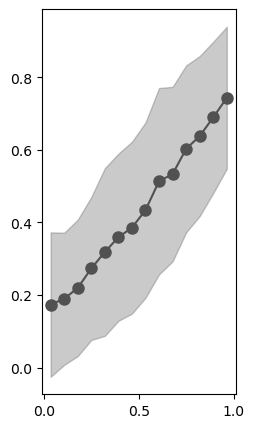

In [6]:
with open(r"Z:\projects\sequence_squad\revision_data\emmett_revisions\Replay_plots_remade\expert\\" + "processed_replay_data.pkl", 'rb') as f:
    expert_master = pickle.load(f)
    
    
fig, ax = plt.subplots(1, 1,figsize=(2.5, 5))
x = expert_master['neuron_rel_forward_replay_positions']
x = [item for sublist in x for item in sublist]
y = expert_master['neuron_rel_awake_positions_forwards']
y = [item for sublist in y for item in sublist]
a,b = plot_sleep_awake_spike_position(ax,x,y, '#515151')
test_univariate_normality(x, y, alpha=0.05)

print('------------------ regression ------------------------------------------')
import statsmodels.api as sm
group1_data = {'x': x, 'y': y}
df1 = pd.DataFrame(group1_data)
# Add a constant term to the independent variable
data = sm.add_constant(df1)

# Fit the regression model
model = sm.OLS(data['y'], data[['const', 'x']],missing='drop').fit()

r = np.sign(model.params['x']) * np.sqrt(model.rsquared)

print(f"r = {r}")
print(f"r^2 = {model.rsquared}")
print(f"p-value = {model.pvalues['x']}")


# figure F

Text(0.5, 1.0, 'held sequences in colour and extra sequences + background in grey')

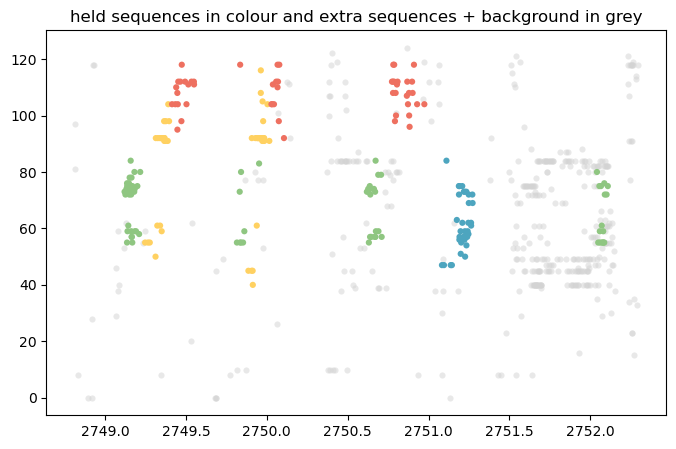

In [7]:
file_path = current_working_dir + 'example_replay_data.json'
with open(file_path, 'r') as file:
    example_sleep_data = json.load(file)

# example_sleep_spikes 
spikes_df = pd.read_csv(current_working_dir + 'example_replay_spikes.csv')

# caluclate interval timings and end points
interval_lengths =[]
for interval in example_sleep_data['behav_time_interval_start']:
    interval_lengths+= [np.diff(interval)[0]]
total_time = sum(interval_lengths)
interval_end_points = np.cumsum(interval_lengths)

timeframe = [2748.8,2752.3]

mask = (spikes_df.timestamp>timeframe[0])*(spikes_df.timestamp<timeframe[-1])
## neuron order:

#define neuron order
neuron_permute_loc = np.zeros(len(example_sleep_data["neuron_index"]))
for i in range(len(example_sleep_data["neuron_index"])):
    neuron_permute_loc[i] = int(list(example_sleep_data["neuron_index"]).index(i))
neuron_order = neuron_permute_loc[(spikes_df.neuron-1).astype(int)]


## plotting:

fig, ax = plt.subplots(1, 1,figsize=(8, 5))


# plot background in grey 
background_keep_mask = []
for item in spikes_df[mask].sequence_type_adjusted:
    if item < 0 or item >= 7.0:
        background_keep_mask.append(True)
    else:
        background_keep_mask.append(False)
background_keep_mask = np.array(background_keep_mask)
ax.scatter(spikes_df[mask][background_keep_mask].timestamp, neuron_order[mask][background_keep_mask],marker = 'o', s=20, linewidth=0,color = 'lightgrey' ,alpha=0.5)

# plot spikes without background
background_remove_mask = spikes_df[mask].sequence_type_adjusted >= 0
background_remove_mask = (spikes_df[mask].sequence_type_adjusted >= 0)*(spikes_df[mask].sequence_type_adjusted != 7.0)*(spikes_df[mask].sequence_type_adjusted != 8.0)
c_ = np.array(colors)[spikes_df[mask][background_remove_mask].sequence_type_adjusted.values.astype(int)]
# ## faster:
ax.scatter(spikes_df[mask][background_remove_mask].timestamp, neuron_order[mask][background_remove_mask],marker = 'o', s=20, linewidth=0,color = c_ ,alpha=1)
ax.set_title('held sequences in colour and extra sequences + background in grey')

# figure G

2
3
4
6
5
Using a rate of 0.083287 events per 0.3 seconds.
Probability of events co-occurring within 0.3 + mean event length:
1 events co-occurring: Probability 0.076631, Percentage 95.89%
2 events co-occurring: Probability 0.003191, Percentage 3.99%
3 events co-occurring: Probability 0.000089, Percentage 0.11%
4 events co-occurring: Probability 0.000002, Percentage 0.00%
5 events co-occurring: Probability 0.000000, Percentage 0.00%
6 events co-occurring: Probability 0.000000, Percentage 0.00%
-------
1
Test statistic: -10.811060125223838
P-value: 8.392844914474116e-10
cohens d
{'cohens_d': np.float64(-2.35916673174081)}
-------
2
Test statistic: 13.911314911292985
P-value: 9.575349766013606e-12
cohens d
{'cohens_d': np.float64(3.0356977903508566)}
-------
3
Test statistic: 2.181275848746699
P-value: 0.04442858080287187
cohens d
{'cohens_d': np.float64(0.5290371013524383)}
-------
4
Test statistic: 5.963697087429965
P-value: 3.464717069681714e-05
cohens d
{'cohens_d': np.float64(1.5398

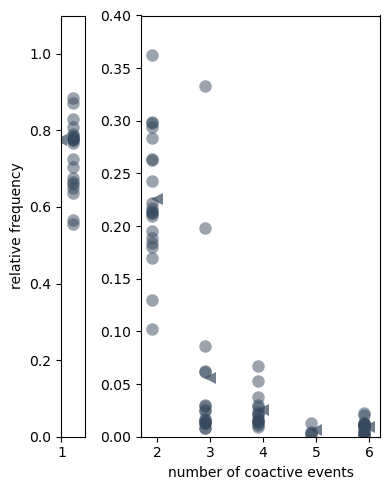

In [ ]:
from collections import defaultdict

collapsed = defaultdict(list)

for k, v in expert_master['coactive_freqs'].items():
    k_int = int(k)
    if k_int >= 6:
        collapsed['6'].extend(v)
    else:
        collapsed[str(k_int)].extend(v)
        
e_coactive_freqs_counts = collapsed

fig, [ax,ax2]= plt.subplots(1, 2,figsize=(4, 5),gridspec_kw={'width_ratios': [1, 10]})

means = []
stds = []
x_ = []
for item in e_coactive_freqs_counts:
    ax.plot(np.ones(len(e_coactive_freqs_counts['1']))*(1),e_coactive_freqs_counts['1'],'o', c = 'red', alpha = 0.5, markeredgewidth = 0, markersize = 9)
    x_ += [item]
    means += [np.median(e_coactive_freqs_counts['1'])]
    stds += [np.std(e_coactive_freqs_counts['1'])]
    break
    
means = np.array(means)[np.argsort(x_)]
stds = np.array(stds)[np.argsort(x_)]
x_ = np.array(x_)[np.argsort(x_)]

ax.plot(x_[0],means[0],'<', color = 'red',alpha = 0.7, markeredgewidth = 0, markersize = 9)
ax.set_xlim(0,2)
    
upper = means + stds
lower = means - stds
ax.fill_between(x_,(lower),(upper),
    alpha=0.2, edgecolor='None', facecolor='red',
    linewidth=1, linestyle='dashdot', antialiased=True)

ax2.set_xlabel('number of coactive events')
ax.set_ylabel('relative frequency')

ax.set_ylim(0,1.1)

means = []
stds = []
x_ = []
for item in e_coactive_freqs_counts:
    if not item == '1':
        print(item)
        ax2.plot(np.ones(len(e_coactive_freqs_counts[item]))*(float(item)-0.1),e_coactive_freqs_counts[item],'o', c = 'red', alpha = 0.5, markeredgewidth = 0, markersize = 9)
        x_ += [float(item)]
        means += [np.mean(e_coactive_freqs_counts[item])]
        stds += [np.std(e_coactive_freqs_counts[item])]
    
means = np.array(means)[np.argsort(x_)]
stds = np.array(stds)[np.argsort(x_)]
x_ = np.array(x_)[np.argsort(x_)]

ax2.plot(x_,means,'<', color = 'red',alpha = 0.7, markeredgewidth = 0, markersize = 8)
ax2.set_ylim(0,0.4)

plt.tight_layout()



## stats
# Input parameters
rate_per_second = np.mean(expert_master['reactivations_per_min'])/60
event_length_s = np.nanmean(expert_master['event_lens'])

# Calculate probabilities and percentages
rate_per_0p3_seconds, results, percentages = calculate_probabilities(rate_per_second, event_length_s)

# Display results
print(f"Using a rate of {rate_per_0p3_seconds:.6f} events per 0.3 seconds.")
print("Probability of events co-occurring within 0.3 + mean event length:")
for k, probability in results.items():
    print(f"{k} events co-occurring: Probability {probability:.6f}, Percentage {percentages[k]:.2f}%")
    
# test each one for significance from expected
expect_percentages= [0.95,0.04,0.011,0,0,0]
for i,key in enumerate(e_coactive_freqs_counts):
    data = np.array(e_coactive_freqs_counts[key])
    print('-------')
    print(key)
    ### all normal so use t test 
    # Hypothesized value (e.g., population mean or constant)
    hypothesized_value = expect_percentages[i]

    # Perform one-sample t-test
    statistic, p_value = ttest_1samp(data, hypothesized_value)

    # Print the test statistic and p-value
    print("Test statistic:", statistic)
    print("P-value:", p_value)
    
    print('cohens d')
    print(effect_size(x=data, test='one_sample_ttest',popmean=hypothesized_value))


# figure H

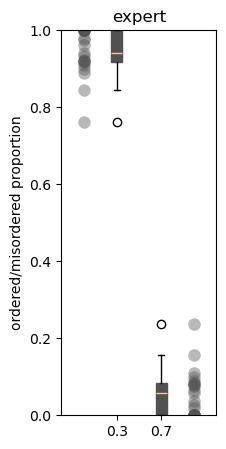

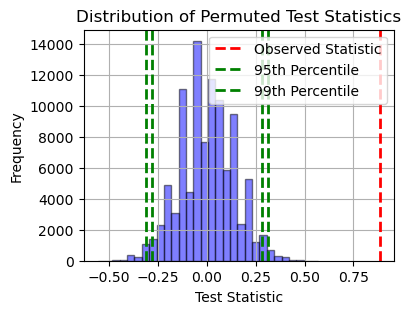

- p-value: 0.0
- 99th percentile of permuted statistics: 0.3145727798344491
- Observed Test Statistic: 0.8835621876858357
cohens d = 14.344563129258281


In [ ]:
def plot_ordered_misrodered(nrem_ordered_misordered,var_string,var_string2, color_):

    ordered = [item[0] for item in nrem_ordered_misordered]
    misordered = [item[1] for item in nrem_ordered_misordered]

    fig, ax = plt.subplots(figsize=(2, 5))

    ax.plot(np.zeros(len(ordered)), ordered, 'o', color = color_,alpha = 0.4, markeredgewidth = 0, markersize = 9)
    ax.boxplot([x for x in ordered if not np.isnan(x)], positions=[0.3], widths=0.1, patch_artist=True, boxprops=dict(facecolor=color_, color=color_), medianprops=dict(color='#FED163'))
    ax.plot(np.ones(len(misordered)), misordered, 'o', color = color_,alpha = 0.4, markeredgewidth = 0, markersize = 9)
    ax.boxplot([x for x in misordered if not np.isnan(x)], positions=[0.7], widths=0.1, patch_artist=True, boxprops=dict(facecolor=color_, color=color_), medianprops=dict(color='#FED163'))

    ax.set_ylabel(var_string2)
    
    ax.set_title(var_string)
    ax.set_ylim(0, 1)
    
    ax.se

plot_ordered_misrodered(expert_master['ordered_misordered'],'expert','ordered/misordered proportion', '#515151')

    
list1 = [float(item[0]) for item in expert_master['ordered_misordered']] 
list2 = [float(item[1]) for item in expert_master['ordered_misordered']] 
list1= [x for x in list1 if not np.isnan(x)] 
list2= [x for x in list2 if not np.isnan(x)] 
permutation_test(list1, list2)
print(f'cohens d = {cohens_d(list1, list2)}')


# figure J

{'whiskers': [<matplotlib.lines.Line2D at 0x2b13014d7e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b13014d420>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2b13014c880>],
 'medians': [<matplotlib.lines.Line2D at 0x2b13014e770>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b13014e590>],
 'means': []}

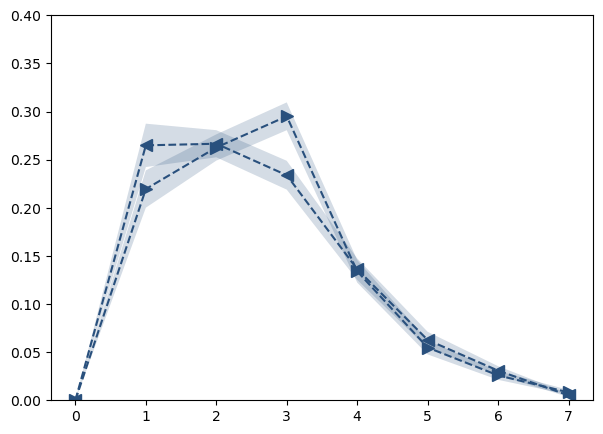

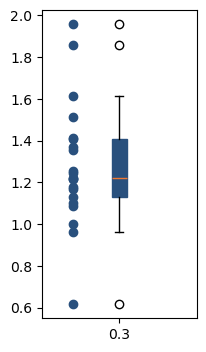

In [ ]:
# plot distribution of warps
f_warp_factors, r_warp_factors, forward_total, reverse_total = extract_mean_warps(pd.DataFrame(expert_master['regression']), [0.1, 0.2, 1,2, 5, 10,20,40])
color_ = "#29507D"
fig,ax = plt.subplots(1, 1,figsize=(7, 5))
plot_warp_factors(ax, f_warp_factors, r_warp_factors, bins_, color_)



fig, ax = plt.subplots(figsize=(2, 4))
proportion_forward_v_reverse = np.array(forward_total)/np.array(reverse_total)
ax.plot(np.zeros(len(proportion_forward_v_reverse)),proportion_forward_v_reverse,'o', color = "#29507D")
ax.boxplot([x for x in proportion_forward_v_reverse if not np.isnan(x)], positions=[0.3], widths=0.1, patch_artist=True, boxprops=dict(facecolor='#29507D', color='#29507D'), medianprops=dict(color='#EE7832'))



# figure K

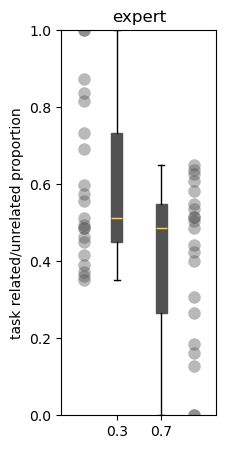

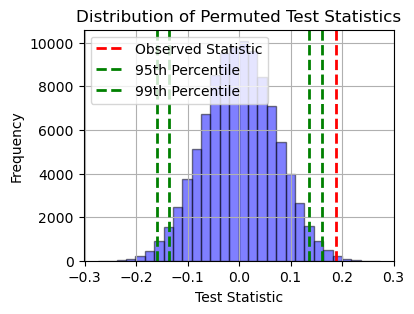

- p-value: 0.00261
- 99th percentile of permuted statistics: 0.16054270965949263
- Observed Test Statistic: 0.1878173237864238
cohens d = 0.9066336142773078


In [ ]:
plot_ordered_misrodered(expert_master['task_nontask'],'expert','task related/unrelated proportion','#515151')

list1 = [float(item[0]) for item in expert_master['task_nontask']] 
list2 = [float(item[1]) for item in expert_master['task_nontask']] 
list1= [x for x in list1 if not np.isnan(x)] 
list2= [x for x in list2 if not np.isnan(x)] 
permutation_test(list1, list2)
print(f'cohens d = {cohens_d(list1, list2)}')


# figure L

dict_keys(['animals', 'reactivations_per_min', 'event_lens', 'regression', 'binned_rate', 'bins_relative_so', 'start_end', 'coactive_freqs', 'ordered_misordered', 'task_nontask', 'awake_seqbyseq_neuron_involvements', 'sleep_seqbyseq_neuron_involvements', 'neuron_rel_awake_positions_reverse', 'neuron_rel_reverse_replay_positions', 'neuron_rel_awake_positions_forwards', 'neuron_rel_forward_replay_positions'])


(0.0, 0.45)

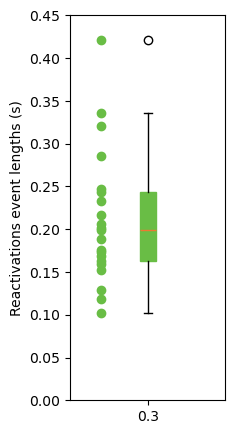

In [ ]:
print(expert_master.keys())
expert_event_lens = expert_master['event_lens']

fig, ax = plt.subplots(figsize=(2, 5))

ax.plot(np.zeros(len(expert_event_lens)), expert_event_lens, 'o', color = '#69BD45')
ax.boxplot(expert_event_lens, positions=[0.3], widths=0.1, patch_artist=True, boxprops=dict(facecolor='#69BD45', color='#69BD45'), medianprops=dict(color='#EE7832'))

ax.set_ylabel('Reactivations event lengths (s)')

ax.set_ylim(0,0.45)

# figure M

In [ ]:
def return_binned_neuron_awake_sleep_rel(awake_dat,sleep_dat):
    awake_sleep_relationship = {}
    for index_, item, in enumerate(awake_dat):
        for index, awake_mouse_data in enumerate(item):

            awake = awake_mouse_data
            sleep = np.array(sleep_dat[index_][index])

            min_neurons_filter = 0
            bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]    

            for bin_ in bins:
                mask = np.round(awake,1) == bin_
                if len(sleep[mask]) > min_neurons_filter:
                    if bin_ in awake_sleep_relationship:
                        awake_sleep_relationship[bin_] += [np.mean(sleep[mask])]
                    else:
                        awake_sleep_relationship[bin_] = [np.mean(sleep[mask])]

    return awake_sleep_relationship




def plot_awake_sleep_relationship(awake_sleep_relationship,color_,ax):




    keys = []
    e_means = []
    sem = []
    for key in awake_sleep_relationship:
        if len(awake_sleep_relationship[key]) > 0:
            keys += [key]
    #         ax.plot([key]* len(e_awake_sleep_relationship[key]),e_awake_sleep_relationship[key],'o', color = 'red')

            a_s_relationship = [x for x in awake_sleep_relationship[key] if not np.isnan(x)]

            e_means += [np.mean(a_s_relationship)]
            sem += [scipy.stats.tstd(a_s_relationship)]
    ax.plot(sorted(keys),np.array(e_means)[np.argsort(keys)],'o--', c = color_, alpha = 1, markeredgewidth = 0, markersize = 10)

    upper = np.array(e_means)[np.argsort(keys)] + sem
    lower = np.array(e_means)[np.argsort(keys)] - sem
    ax.fill_between(sorted(keys),(lower),(upper),
        alpha=0.2, edgecolor='None', facecolor=color_,
        linewidth=1, linestyle='dashdot', antialiased=True)

    x = np.linspace(0, 1, 10)  # Example x values
    y = x  # Since x equals y, y values are the same as x values
    plt.plot(x,y,'--')


    ax.set_ylim(0,0.8)


    ax.set_ylabel('replay proportion involvement')
    ax.set_xlabel('awake proportion involvement')

    #################################################

    from scipy.optimize import curve_fit
    from scipy.stats import t

    # Extract the bins and corresponding values
    bins = list(awake_sleep_relationship.keys())
    
    bin_centers = np.array(bins)[np.argsort(bins)]
    values = np.array([np.nanmean(awake_sleep_relationship[bin]) for bin in bins])[np.argsort(bins)]

    # Define the exponential function
    def exponential_model(x, a, b):
        return a * np.exp(b * x)

    # Fit the model to the data
    popt, pcov = curve_fit(exponential_model, bin_centers, values)

    # Extract the fitting parameters
    a, b = popt

    # Calculate the fitted values
    fitted_values = exponential_model(bin_centers, *popt)

    # Calculate R-squared
    residuals = values - fitted_values
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((values - np.mean(values))**2)
    r_squared = 1 - (ss_res / ss_tot)

    # Degrees of freedom
    dof = max(0, len(bin_centers) - len(popt))

    # Calculate standard errors of the parameters
    perr = np.sqrt(np.diag(pcov))

    # Calculate t-values for the parameters
    t_values = popt / perr

    # Calculate p-values for the parameters
    p_values = [2 * (1 - t.cdf(np.abs(t_val), dof)) for t_val in t_values]

    print(f'Fitted parameters: a = {a}, b = {b}')
    print(f'R-squared: {r_squared}')
    print(f'p-values: {p_values}')


    # Plot the original data and the fitted curve
    # plt.scatter(bin_centers, values, label='Data')
    plt.plot(bin_centers, fitted_values, label='Fitted curve', color='red', alpha = 0.4)
    plt.xlabel('Bin Center')
    plt.ylabel('Value')


Fitted parameters: a = 0.03267556939789752, b = 3.21309210901926
R-squared: 0.9926259080124209
p-values: [np.float64(1.7030314393595702e-05), np.float64(1.1325253623795106e-08)]


Text(0.5, 1.0, 'late')

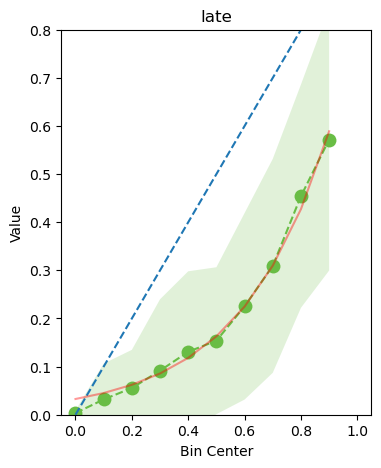

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(4, 5))
late_awake_sleep_relationship = return_binned_neuron_awake_sleep_rel(expert_master['awake_seqbyseq_neuron_involvements'],expert_master['sleep_seqbyseq_neuron_involvements'])
plot_awake_sleep_relationship(late_awake_sleep_relationship,'#69BD45',ax)
ax.set_title('late')

# figure N

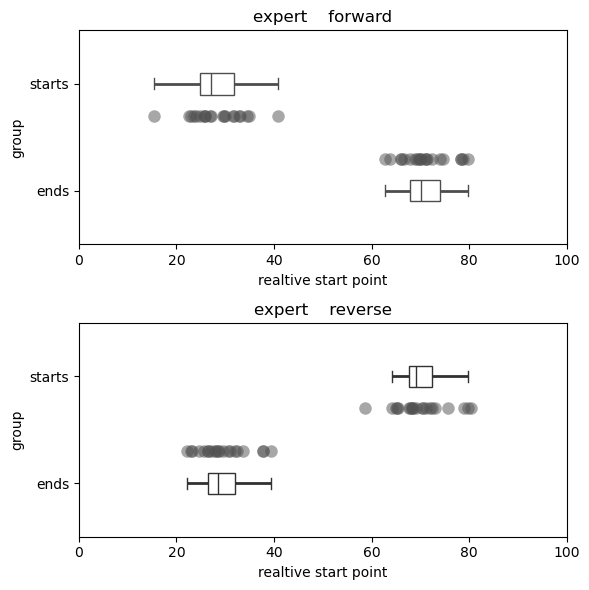

In [ ]:
fig,[ax,ax2] = plt.subplots(2, 1,figsize=(6, 6)) 
all_chunk_reverse_start_mean, all_chunk_forward_start_mean, all_chunk_reverse_end_mean, all_chunk_forward_end_mean = extract_start_end_points(pd.DataFrame(expert_master['start_end']))
plot_start_end_times(all_chunk_reverse_start_mean,all_chunk_forward_start_mean,all_chunk_reverse_end_mean,all_chunk_forward_end_mean,ax,ax2,'expert','#515151')

# figure O

model p value (f statistic) = 
3.1712640703044366e-09
r2 = 
0.6071427149335138
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     5.820
Date:                Tue, 16 Dec 2025   Prob (F-statistic):             0.0190
Time:                        10:53:29   Log-Likelihood:                -227.53
No. Observations:                  61   AIC:                             459.1
Df Residuals:                      59   BIC:                             463.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

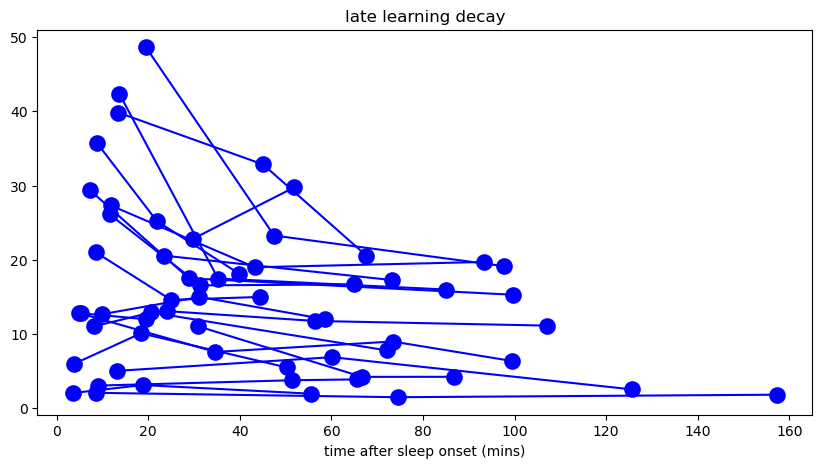

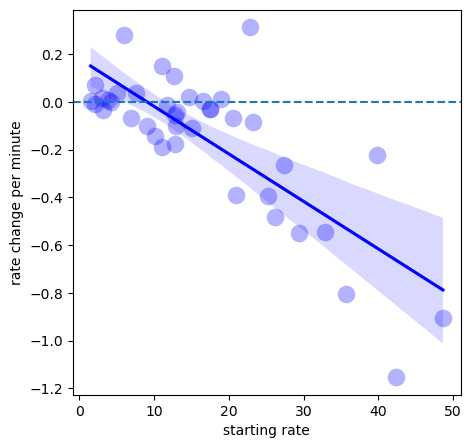

In [ ]:

fig,ax = plt.subplots(1, 1,figsize=(10, 5))
AA_rate = []
AA_post_so_time = []
times = []
rates = []
for i,item in enumerate(expert_master['binned_rate']):
    across_chunks_x = []
    across_chunks_y = []
    for e,chunk_item in enumerate(item):
        #mean for each time series across chunks
        across_chunks_x += [np.mean(expert_master['bins_relative_so'][i][e])]
        across_chunks_y += [np.mean(chunk_item)]
    AA_rate+=[across_chunks_y]
    AA_post_so_time+=[across_chunks_x]
    ax.plot(across_chunks_x,across_chunks_y, '-o',c = 'blue', alpha = 1, markersize = 12, markeredgewidth = 0)
    # save out stuff for plot 2
    rate_change_per_min = np.diff(across_chunks_y)/np.diff(across_chunks_x)
    times += across_chunks_y[0:-1]
    rates += list(rate_change_per_min)
    

ax.set_title('late learning decay')
ax.set_xlabel('time after sleep onset (mins)')

fig,ax = plt.subplots(1, 1,figsize=(5, 5))                
sns.regplot(x=times, y=rates, ax = ax, color = 'blue',scatter_kws={'s': 160, 'alpha': 0.3,'linewidths': 0})
ax.set_xlabel('starting rate')
ax.set_ylabel('rate change per minute')
ax.axhline(0,0,ls ='--')

group1_data = {'x': times, 'y': rates}
# SaveFig(title_+'decay_regression.pdf',r'C:\Users\Emmett Thompson\Documents\plots\\')
df1 = pd.DataFrame(group1_data)

# Fit linear regression for Group 1
model_group1 = sm.OLS.from_formula('y ~ x', data=df1).fit()

# print(model_group1.summary())
print('model p value (f statistic) = ')
print(model_group1.f_pvalue)
print('r2 = ')
print(model_group1.rsquared)


# STATS

# flatten list
x = [item for sublist in AA_post_so_time for item in sublist]
y = [item for sublist in AA_rate for item in sublist]

data_for_stats = {'x': x, 'y': y}
df_stats = pd.DataFrame(data_for_stats)

# Add a constant term to the independent variable
data = sm.add_constant(df_stats)
# data = sm.add_constant(df2)
# Fit the regression model
model = sm.OLS(data['y'], data[['const', 'x']],missing='drop').fit()
# Print the summary statistics
print(model.summary())
r = np.sign(model.params['x']) * np.sqrt(model.rsquared)

print(f'r = {r}')
print(model.rsquared)
print(model.pvalues['x'])


In [ ]:
#b 
# Get the current working directory
f3_working_dir = os.getcwd()
f3_working_dir = '//'.join(f3_working_dir.split('\\')[0:-1]) + r'//data/f2//'

PP_PATH = f3_working_dir + 'ppseq_output_awake\\'
dat_path = f3_working_dir + 'example_mouse_data\\'
        
file = find_example_file(PP_PATH)
        
data = Load_example_data(PP_PATH, file, dat_path)


LOADING processed_spike_data
      A corresponding time span has been found. Time span set to [5400, 6000]

LOADING BEHAV DATA
done


C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_47932\2636075624.py:477: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  return pickle.load(input_file)


In [13]:
file_path = current_working_dir + 'example_replay_data.json'
with open(file_path, 'r') as file:
    example_sleep_data = json.load(file)

# example_sleep_spikes 
spikes_df = pd.read_csv(current_working_dir + 'example_replay_spikes.csv')

# caluclate interval timings and end points
interval_lengths =[]
for interval in example_sleep_data['behav_time_interval_start']:
    interval_lengths+= [np.diff(interval)[0]]
total_time = sum(interval_lengths)
interval_end_points = np.cumsum(interval_lengths)

# 10
timeframe = [971.3,973.5]

mask = (spikes_df.timestamp>timeframe[0])*(spikes_df.timestamp<timeframe[-1])
## neuron order:

#define neuron order
neuron_permute_loc = np.zeros(len(example_sleep_data["neuron_index"]))
for i in range(len(example_sleep_data["neuron_index"])):
    neuron_permute_loc[i] = int(list(example_sleep_data["neuron_index"]).index(i))
neuron_order = neuron_permute_loc[(spikes_df.neuron-1).astype(int)]

In [17]:
neuron_order

array([19., 19., 92., ..., 93., 93., 93.], shape=(693758,))

In [16]:
spikes_df[mask].reset_index()

,index,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,neuron,timestamp,sequence_type,seq_confidence,sequence_type_adjusted
0,1447,1447,1447,1447,1447,2.0,971.6383,7.0,0.83,7.0
1,1448,1448,1448,1448,1448,2.0,971.6544,7.0,0.90,7.0
2,1449,1449,1449,1449,1449,2.0,972.4994,6.0,0.99,6.0
3,1450,1450,1450,1450,1450,2.0,972.5159,6.0,1.00,6.0
4,1451,1451,1451,1451,1451,2.0,972.5262,6.0,1.00,6.0
...,...,...,...,...,...,...,...,...,...,...
480,688053,688053,688053,688053,688053,124.0,971.5700,7.0,0.90,7.0
481,688054,688054,688054,688054,688054,124.0,971.7039,7.0,0.93,7.0
482,688055,688055,688055,688055,688055,124.0,971.7140,7.0,0.93,7.0
483,688056,688056,688056,688056,688056,124.0,971.8029,7.0,0.67,7.0


In [ ]:
# d 

replay_motif_data= pd.read_csv('Z:\\projects\\sequence_squad\\organised_data\\ppseq_data\\finalised_output\\striatum\\paper_submission\\post_sleep\\\\178_1_7_run_1207023_1350\\\\_final_analysis_output\\chunk3_13300to14300\\temporal_structure_analysis\\replay_motif_data_updated.csv')

# Drop all columns whose name starts with 'Unnamed'
replay_motif_data = replay_motif_data.loc[:, ~replay_motif_data.columns.str.contains('^Unnamed')]

In [ ]:
# e

with open(r"Z:\projects\sequence_squad\revision_data\emmett_revisions\Replay_plots_remade\expert\\" + "processed_replay_data.pkl", 'rb') as f:
    expert_master = pickle.load(f)
    
    
fig, ax = plt.subplots(1, 1,figsize=(2.5, 5))
x = expert_master['neuron_rel_forward_replay_positions']
x = [item for sublist in x for item in sublist]
y = expert_master['neuron_rel_awake_positions_forwards']
y = [item for sublist in y for item in sublist]